In [1]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import pandas as pd
from predict import GCN, predict

In [14]:
from dataset import HW3Dataset
HW3Dataset(root='data/hw3/')

HW3Dataset()

In [2]:
data = torch.load(r"/home/student/Data-analysis-and-presentation/Data-analysis-and-presentation/HW3/data/hw3/processed/data.pt")

In [7]:
G=nx.from_edgelist(data.edge_index.numpy().T.tolist())

We willl note that there are 3423 without neighbors

In [21]:
len(G.nodes)

96577

In [37]:
len(G.edges)

438264

In [8]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
np.percentile(np.array(degree_sequence), [100, 99, 97.5, 95, 90, 80, 70, 60, 50, 40, 30, 20, 10])

array([3.817e+03, 6.600e+01, 4.000e+01, 2.700e+01, 1.900e+01, 1.200e+01,
       8.000e+00, 6.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
       1.000e+00])

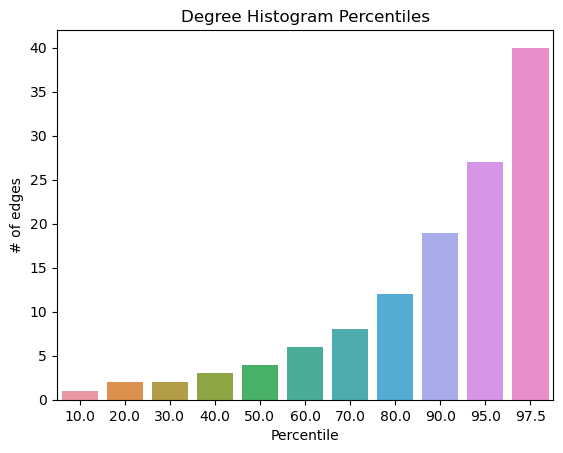

In [10]:
sns.barplot(x=[97.5, 95, 90, 80, 70, 60, 50, 40, 30, 20, 10], y=np.percentile(np.array(degree_sequence), [97.5, 95, 90, 80, 70, 60, 50, 40, 30, 20, 10]))
plt.title("Degree Histogram Percentiles")
plt.ylabel("# of edges")
plt.xlabel("Percentile")
plt.show()

22


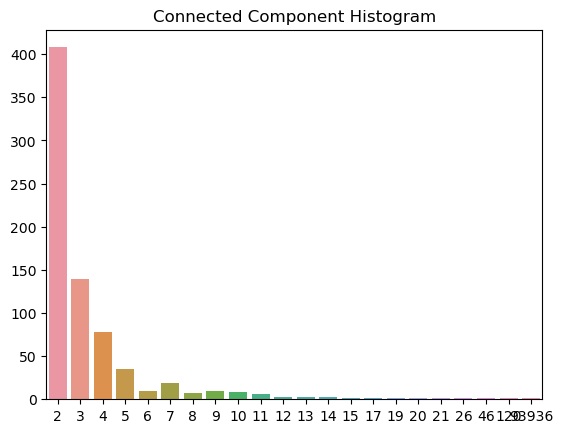

In [12]:
# Connected Component Histogram
component_sizes = pd.DataFrame([len(c) for c in nx.connected_components(G)]).value_counts()
print(len(component_sizes))
sns.barplot(x=list(itertools.chain(*list(component_sizes.index))), y=list(component_sizes.values))
plt.title('Connected Component Histogram')
plt.show()

In [8]:
cc = nx.connected_components(G)

In [10]:
train_label_list = list()
val_label_list = list()
for component in cc:
    train_labels = [data.y[n].item() for n in component if n in data.train_mask.tolist()]
    in_val = [41 for n in component if n in data.val_mask.tolist()]
    train_label_list.append(train_labels)
    val_label_list.append(in_val)

In [11]:
all_labels = [data.y[n].item() for n in data.train_mask.tolist()]
temp = pd.DataFrame(all_labels).value_counts()
temp[:10]

28    14328
16     8757
24     6162
34     4783
10     4536
30     3823
8      3573
2      3147
5      2587
4      2539
Name: count, dtype: int64

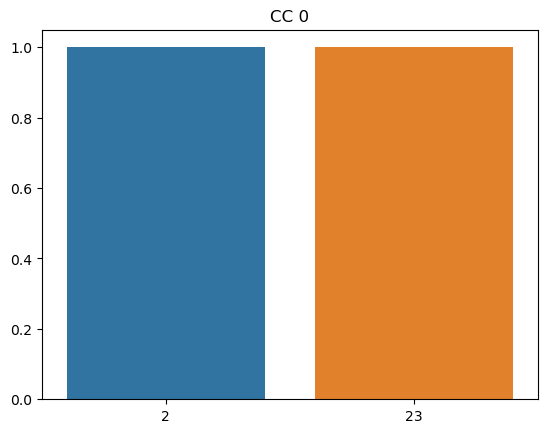

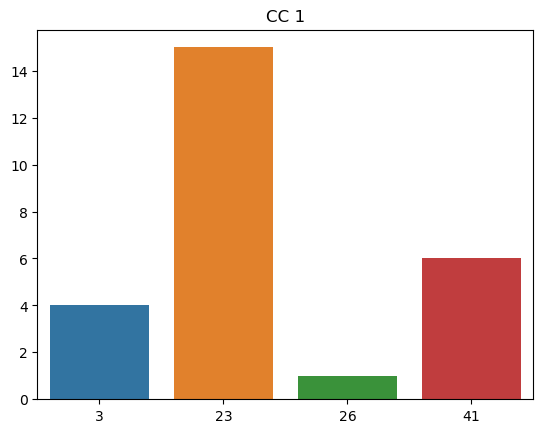

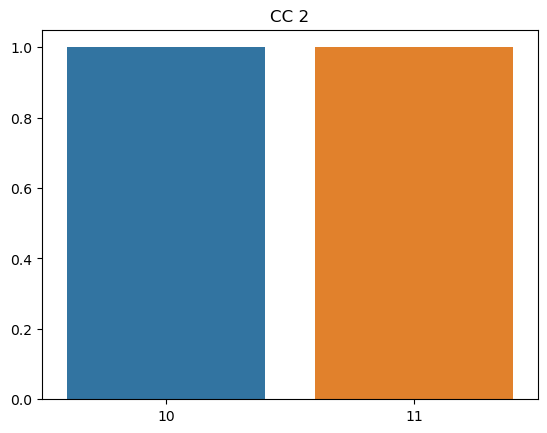

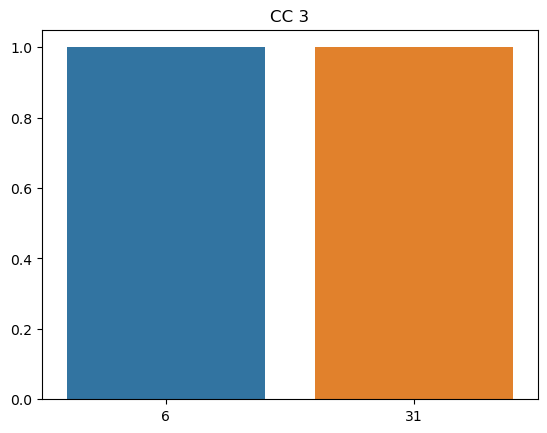

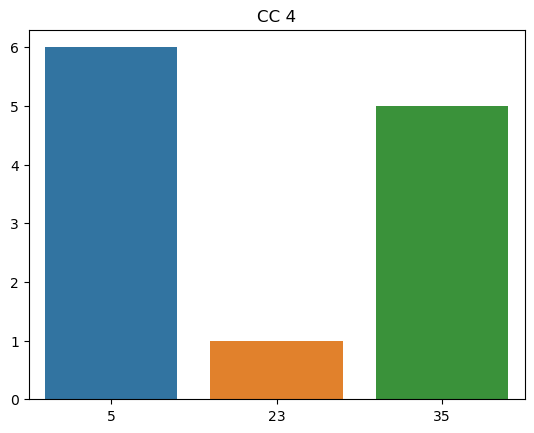

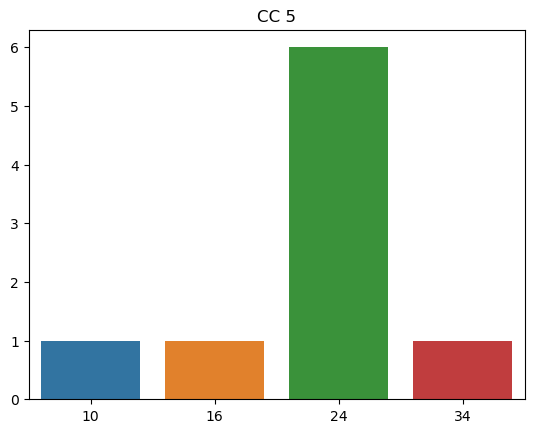

In [12]:
for i in range(len(train_label_list)):
    results = train_label_list[i] + val_label_list[i]
    temp = pd.DataFrame(results).value_counts()
    # print(temp)
    sns.barplot(x=list(itertools.chain(*list(temp.index))), y=list(temp.values))
    plt.title(f"CC {i}")
    plt.show()
    if i == 5:
        break

Final Model results

In [ ]:
model = GCN(hidden_channels=1024)
model.load_state_dict(torch.load('../HW3/exp/GNC/models/trained_model.pt'))

idx_list, preds = predict(model, data)

pred_df = pd.DataFrame(data={'idx': idx_list, 'prediction': preds})
pred_df['ground_truth'] = list(itertools.chain(*data.y.tolist()))
print(f"Training accuracy: {(pred_df.ground_truth[:80000] == pred_df.prediction[:80000]).mean()}")
print(f"Val accuracy: {(pred_df.ground_truth[80000:] == pred_df.prediction[80000:]).mean()}")

Training accuracy: 0.6602625
Val accuracy: 0.59605
